In [ ]:
Build a Data Science model to analyse the effect on the US Home Prices due to certain factors

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [3]:
us_house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
us_house_price_df.head()

,Unnamed: 0,CSUSHPISA,Year,Month,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Cons_Material,FEDFUNDS,Num_Households,Household_income,Subsidy,Population above 65
DATE,,,,,,,,,,,,,,,,
2004-01-01,0,155.752,2004.0,10.0,53242.000000,189471600.0,3.9,190.8,5.5,71.22910,165.9,1.76,112000.0,65760.0,27.201,12.304719
2004-01-01,1,157.528,2004.0,11.0,53401.000000,189647800.0,4.3,191.7,5.4,71.36205,165.5,1.93,112000.0,65760.0,27.201,12.304719
2004-01-01,2,159.331,2004.0,12.0,53560.000000,189849000.0,4.1,191.7,5.4,71.30608,166.3,2.16,112000.0,65760.0,27.201,12.304719
2005-01-01,3,161.289,2005.0,1.0,53719.000000,190030800.0,4.4,191.6,5.3,71.31815,168.6,2.28,113343.0,66780.0,27.651,12.360163
2005-01-01,4,163.344,2005.0,2.0,53768.666667,190206400.0,4.3,192.4,5.4,71.23395,170.4,2.50,113343.0,66780.0,27.651,12.360163


In [4]:
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

In [6]:
# display summary statistics for each variable, including mean, median, standard deviation, minimum, and maximum values.

summary_stats = us_house_price_df.describe()
summary_stats

,Unnamed: 0,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Cons_Material,FEDFUNDS,Num_Households,Household_income,Subsidy,Population above 65
count,219.000000,219.000000,219.000000,2.190000e+02,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,109.000000,184.556027,57915.406393,2.013553e+08,6.350685,234.268653,6.029224,69.335632,218.625808,1.317443,122280.054795,69222.465753,35.464014,14.196661
std,63.364028,41.016495,3753.615989,5.000348e+06,1.915901,24.903354,2.130139,2.078698,42.301284,1.651082,5560.386715,4682.458123,5.693156,1.501167
min,0.000000,136.531000,53017.000000,1.894716e+08,3.300000,190.800000,3.500000,60.171120,165.500000,0.050000,112000.000000,63350.000000,27.201000,12.304719
25%,54.500000,154.901500,54915.500000,1.976548e+08,5.050000,216.185000,4.450000,67.463985,191.700000,0.110000,117181.000000,65740.000000,32.669000,12.856259
50%,109.000000,176.536000,56518.666667,2.026830e+08,5.700000,234.100000,5.200000,69.554780,209.800000,0.330000,122459.000000,67520.000000,33.806000,13.891076
75%,163.500000,201.831500,61023.166667,2.056774e+08,7.350000,250.905000,7.700000,71.274560,232.600000,2.175000,127586.000000,73030.000000,38.859000,15.397698
max,218.000000,304.468000,65997.000000,2.075878e+08,12.200000,298.812000,14.800000,72.315600,353.015000,5.260000,131202.000000,78250.000000,48.021000,17.128121


In [7]:
# # Correlation matrix to measure linear relationships between variables.

corr_matrix = us_house_price_df.corr()
corr_matrix

,Unnamed: 0,CSUSHPISA,Per_Capita_GDP,working_age_pop,Houses,CPI,UNRATE,Emp_Rate,Cons_Material,FEDFUNDS,Num_Households,Household_income,Subsidy,Population above 65
Unnamed: 0,1.000000,0.714083,0.920996,0.952902,-0.233663,0.971977,-0.256386,-0.093600,0.849549,-0.433229,0.993434,0.765643,0.948037,0.981928
CSUSHPISA,0.714083,1.000000,0.888338,0.508550,0.015697,0.788463,-0.542263,0.408300,0.879417,0.131832,0.688002,0.828904,0.810844,0.815566
Per_Capita_GDP,0.920996,0.888338,1.000000,0.799865,-0.180986,0.927115,-0.536853,0.252619,0.888341,-0.118132,0.912960,0.875409,0.904389,0.955664
working_age_pop,0.952902,0.508550,0.799865,1.000000,-0.211076,0.901708,-0.166290,-0.220781,0.717728,-0.526221,0.963695,0.613151,0.841181,0.883235
Houses,-0.233663,0.015697,-0.180986,-0.211076,1.000000,-0.105110,0.054700,0.178720,0.024618,0.229406,-0.248980,-0.147519,-0.112949,-0.226436
CPI,0.971977,0.788463,0.927115,0.901708,-0.105110,1.000000,-0.275140,-0.037112,0.934684,-0.373535,0.961121,0.724415,0.962762,0.972332
UNRATE,-0.256386,-0.542263,-0.536853,-0.166290,0.054700,-0.275140,1.000000,-0.893626,-0.311847,-0.514938,-0.293327,-0.517792,-0.187416,-0.319808
Emp_Rate,-0.093600,0.408300,0.252619,-0.220781,0.178720,-0.037112,-0.893626,1.000000,0.085877,0.754195,-0.073177,0.350924,-0.076072,0.007646
Cons_Material,0.849549,0.879417,0.888341,0.717728,0.024618,0.934684,-0.311847,0.085877,1.000000,-0.259867,0.826326,0.667849,0.914327,0.894315
FEDFUNDS,-0.433229,0.131832,-0.118132,-0.526221,0.229406,-0.373535,-0.514938,0.754195,-0.259867,1.000000,-0.420158,0.084950,-0.368397,-0.334772


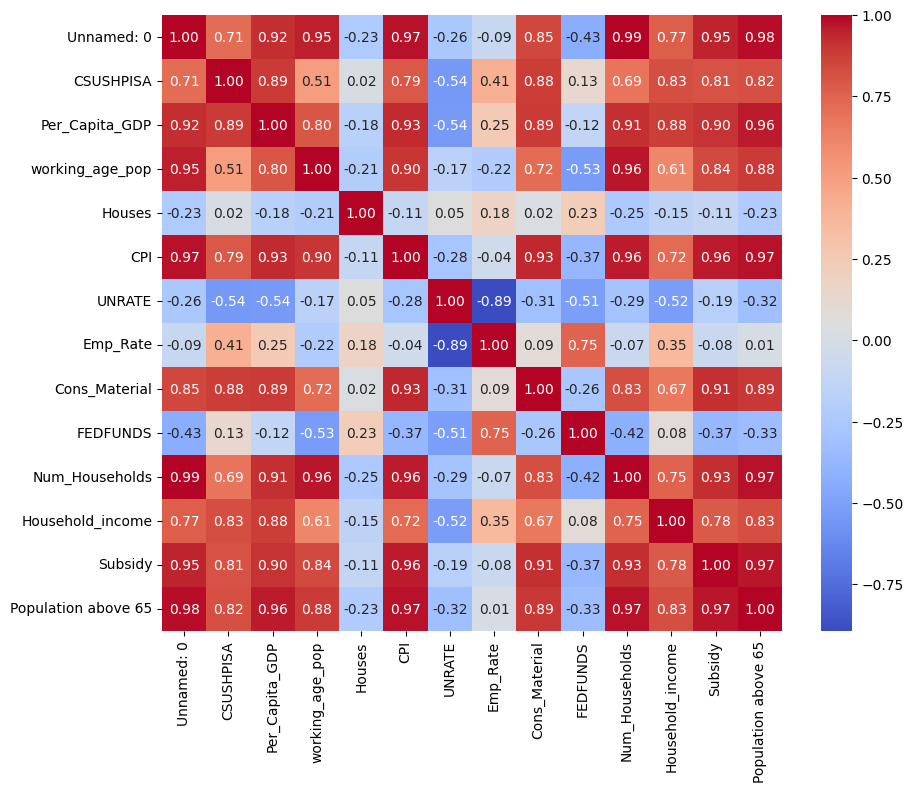

In [8]:
# Visualize correlations using a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [15]:
us_house_price_df.index = pd.to_datetime(us_house_price_df.index)

In [16]:
continuous_index = pd.date_range(start=us_house_price_df.index.min(), end=us_house_price_df.index.max(), freq='MS')

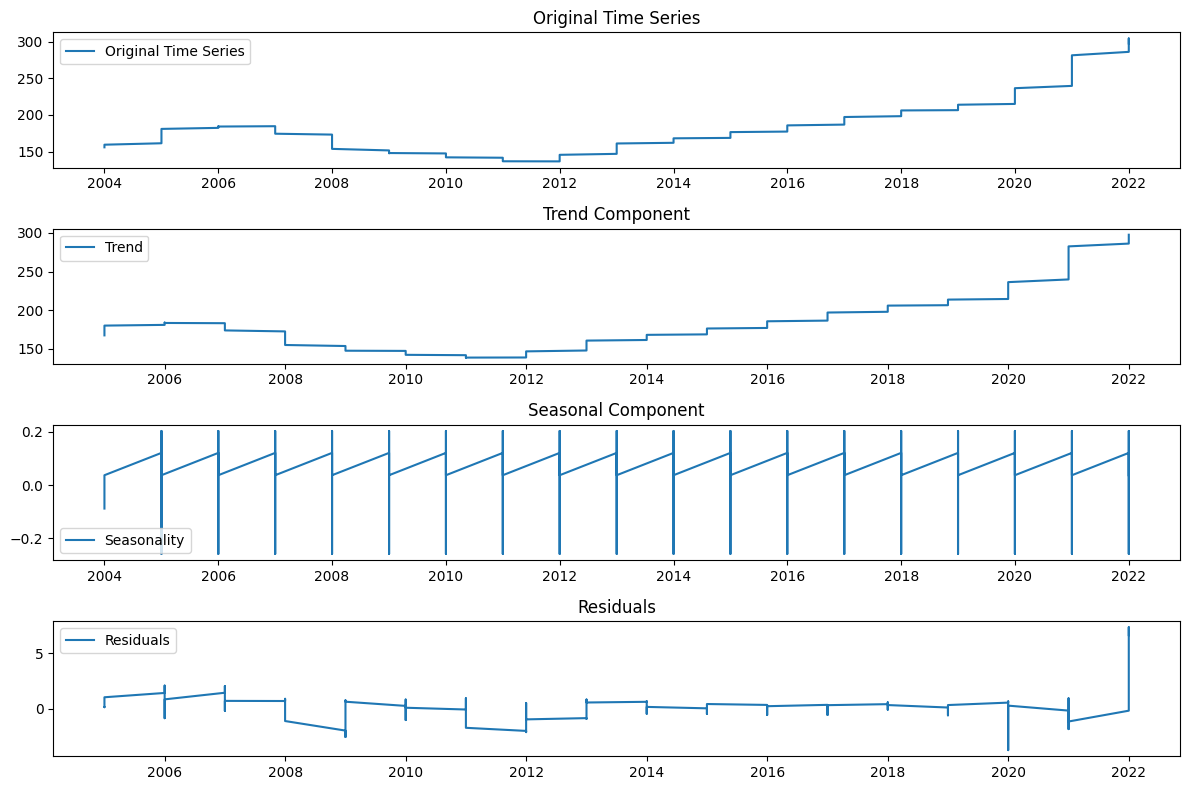

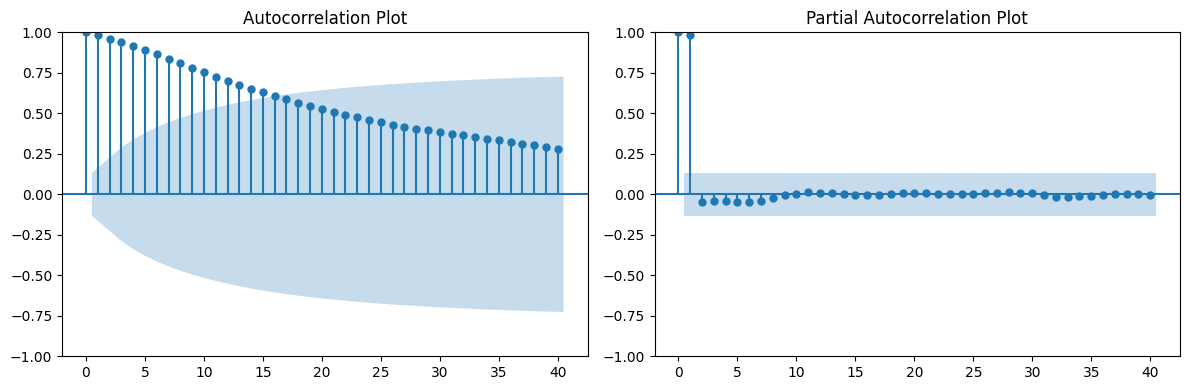

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=40, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

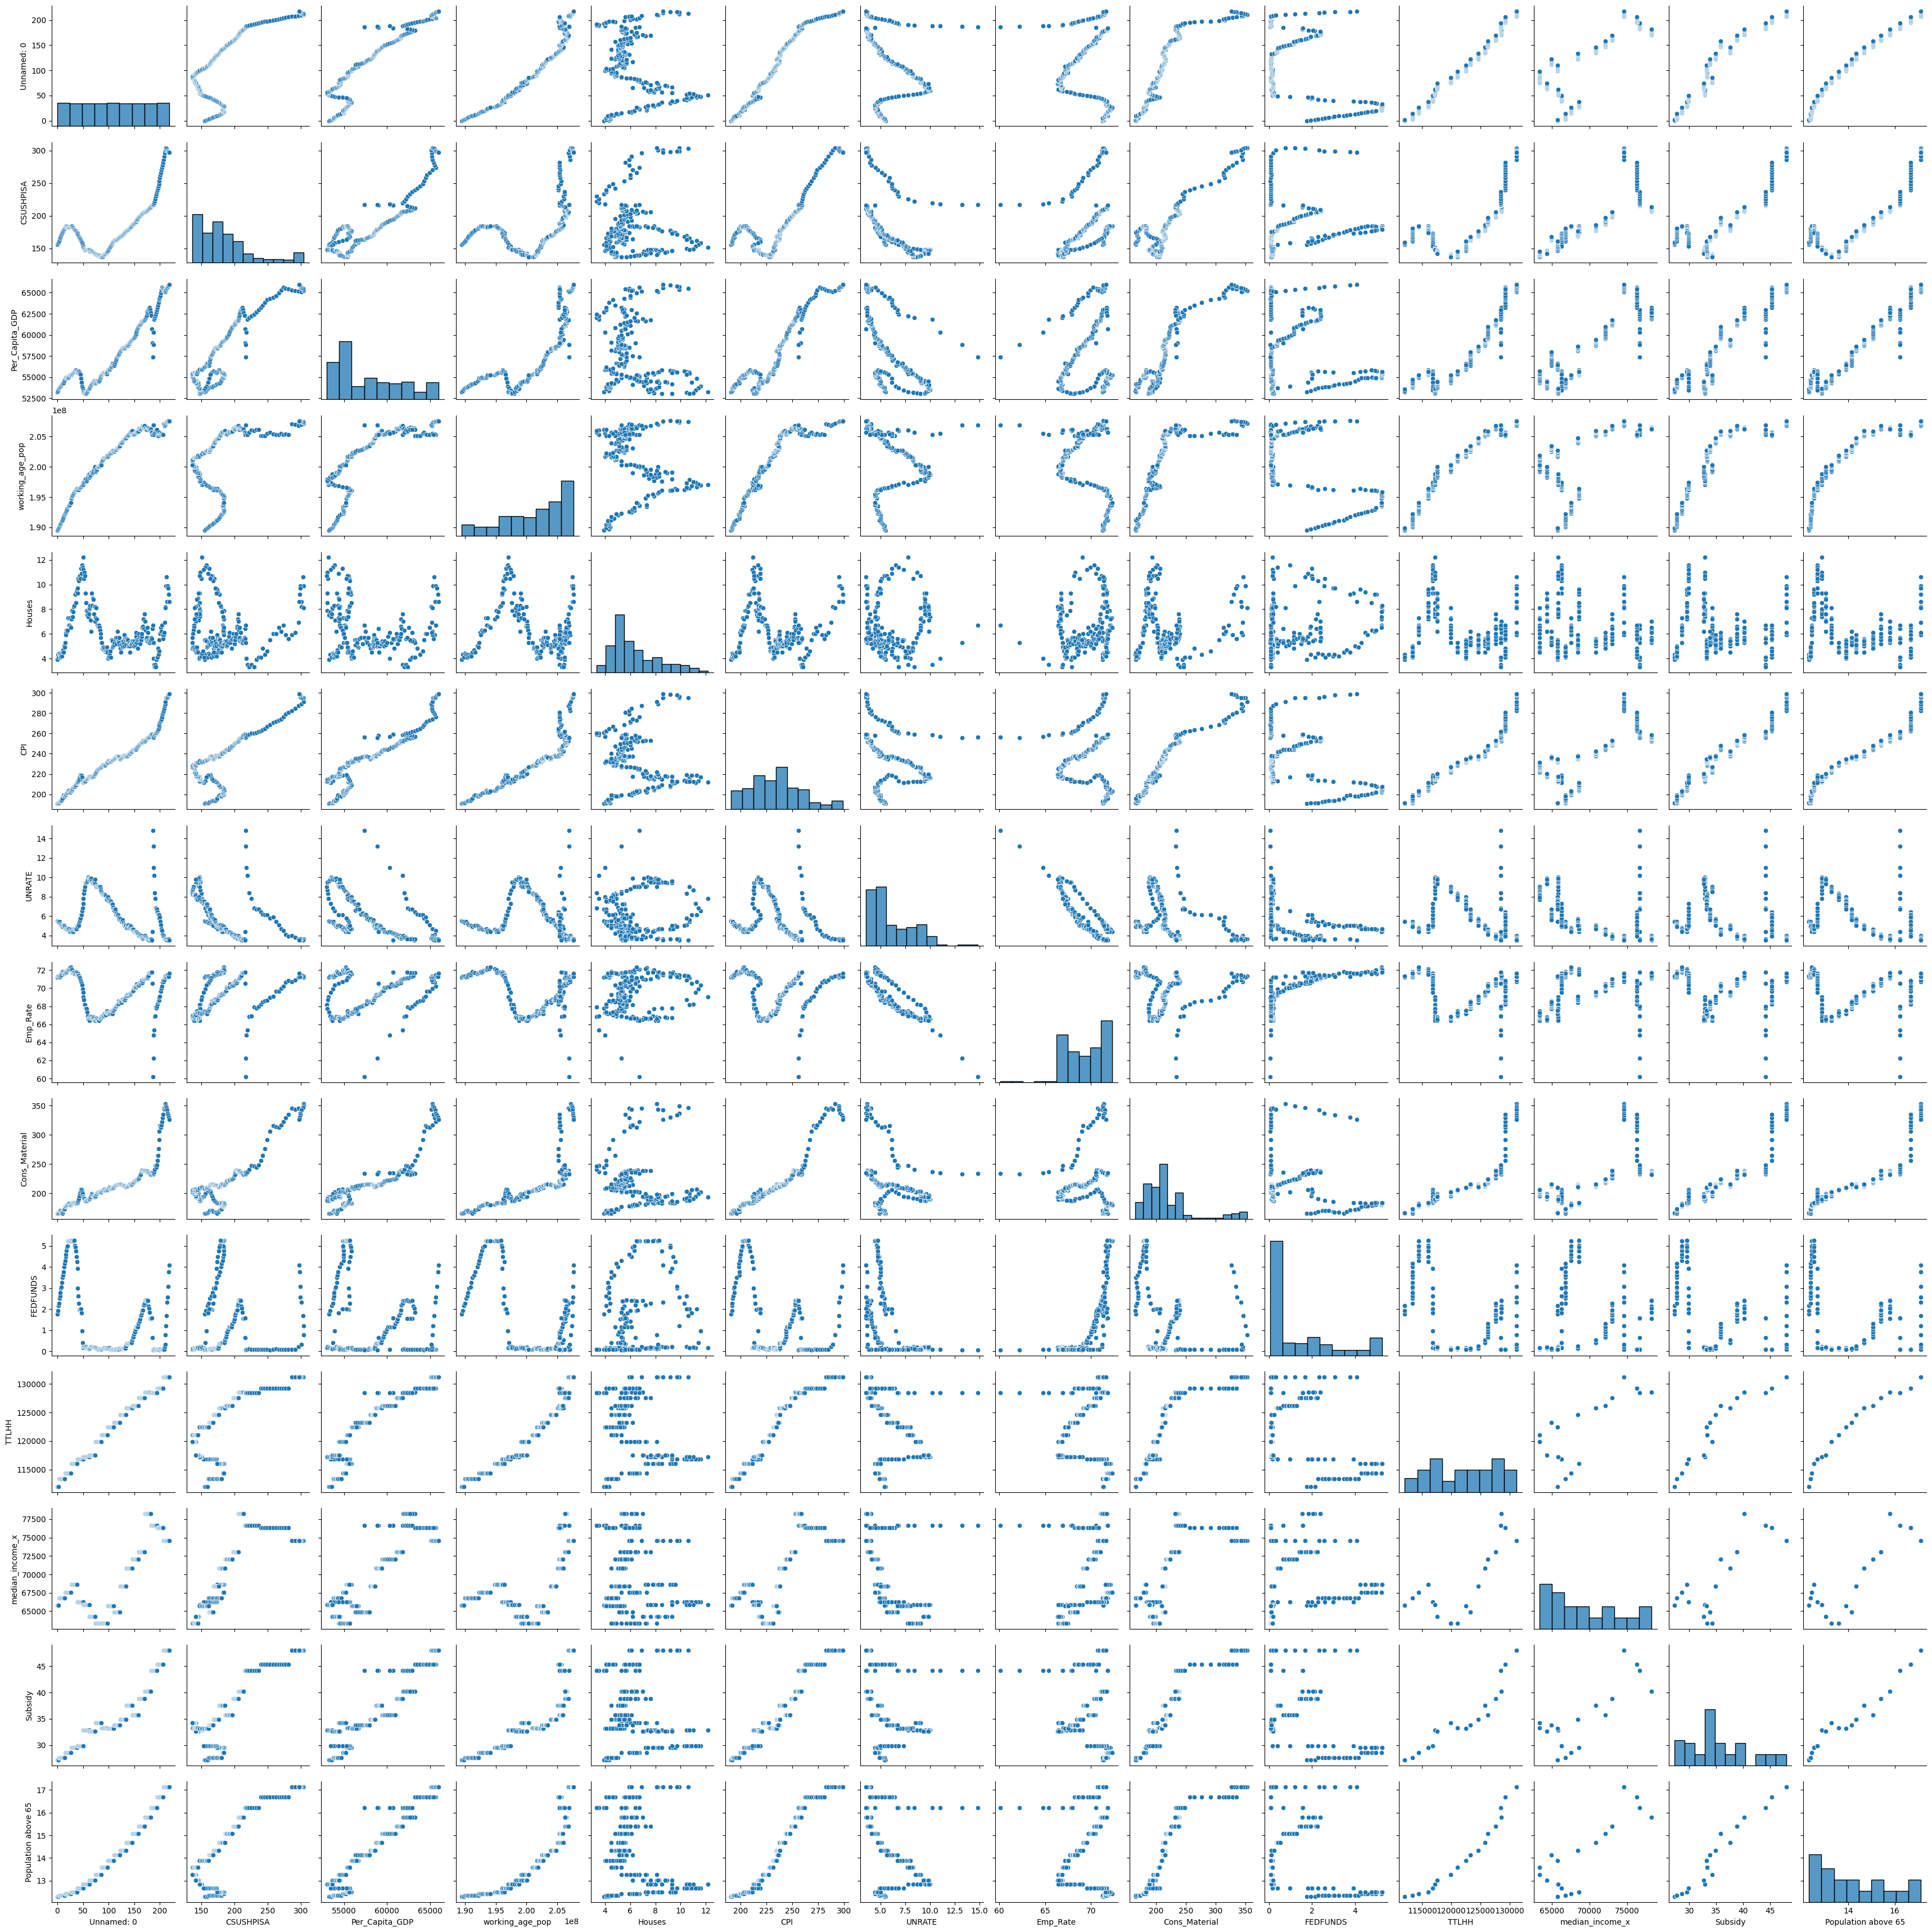

In [11]:
sns.pairplot(us_house_price_df)

In [19]:
us_house_price_df.columns

Index(['Unnamed: 0', 'CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop',
       'Houses', 'CPI', 'UNRATE', 'Emp_Rate', 'Cons_Material', 'FEDFUNDS',
       'Num_Households', 'Household_income', 'Subsidy', 'Population above 65'],
      dtype='object')

In [20]:
factors = ['CSUSHPISA', 'Per_Capita_GDP', 'working_age_pop','Houses', 'CPI', 'UNRATE', 'Emp_Rate', 'Cons_Material', 'FEDFUNDS','Num_Households', 'Household_income', 'Subsidy', 'Population above 65']

<Figure size 1300x800 with 0 Axes>

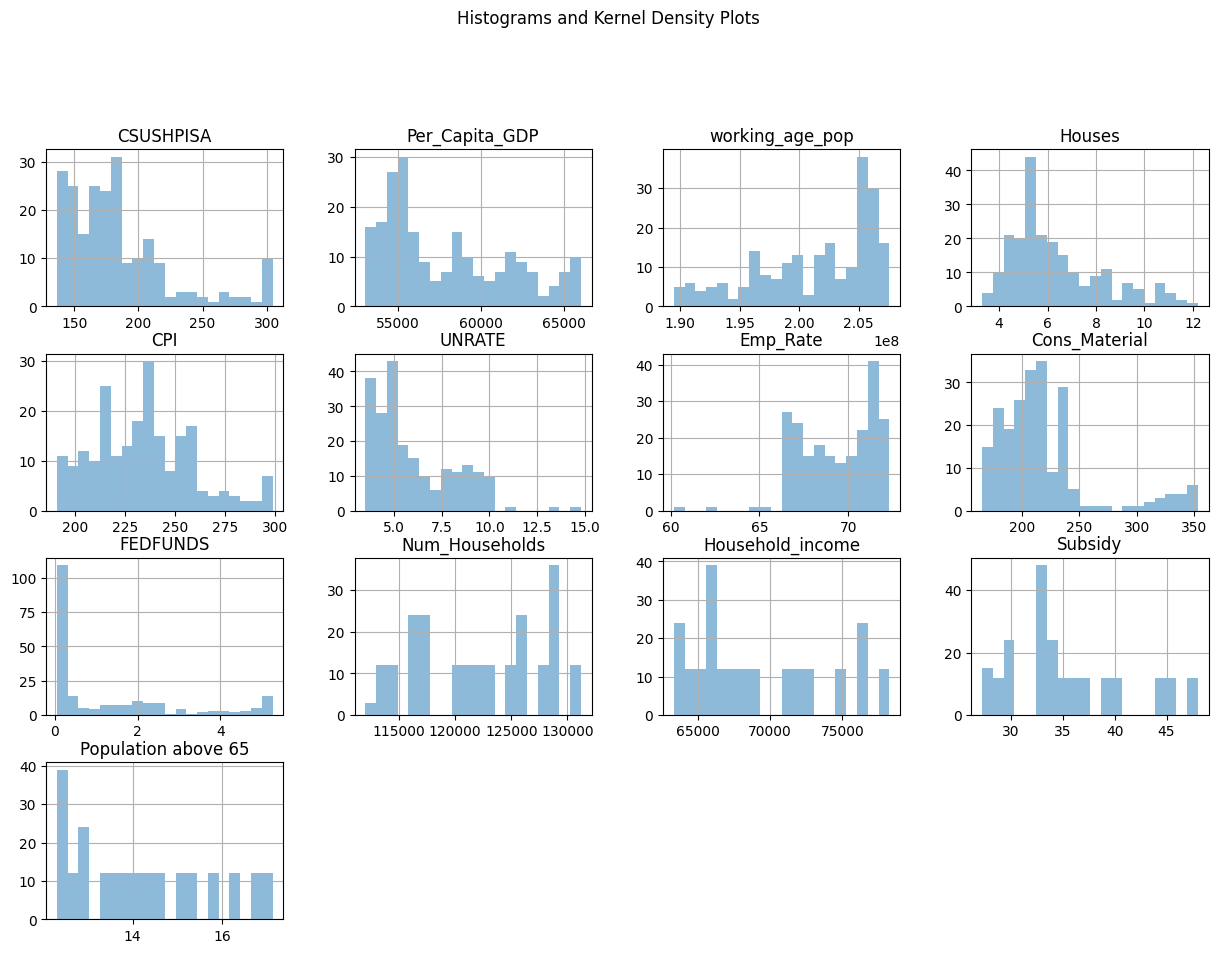

In [21]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

In [23]:
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

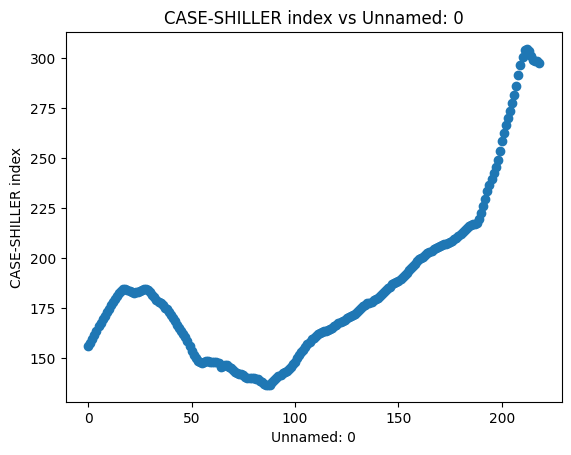

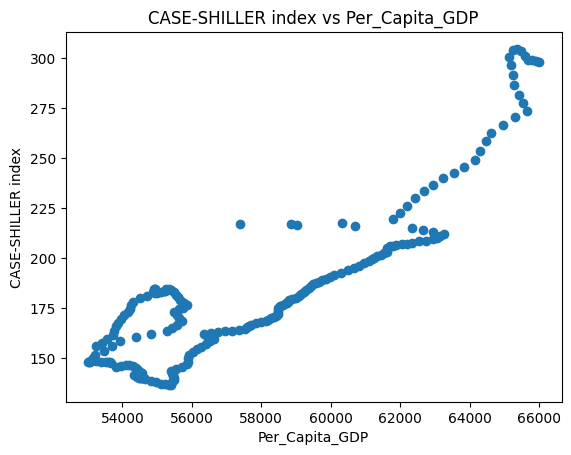

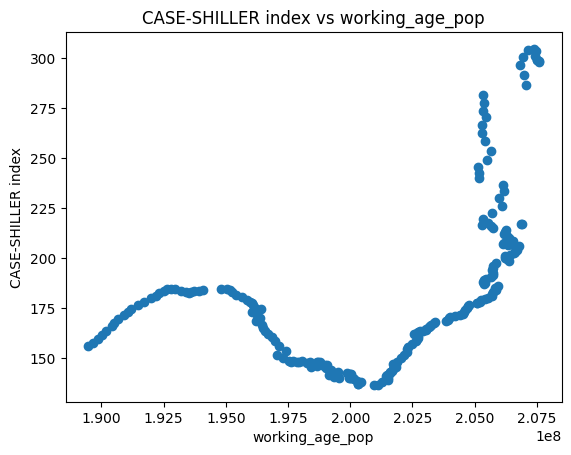

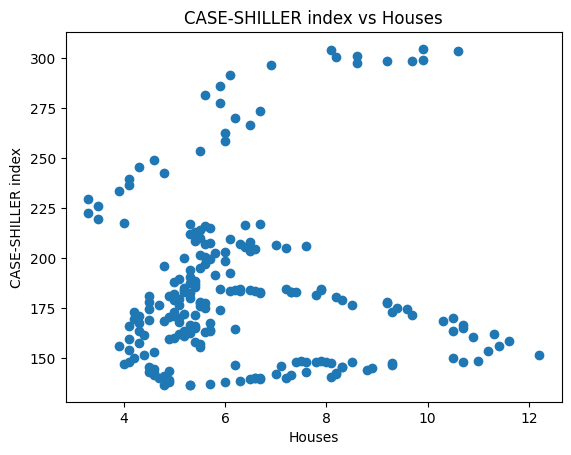

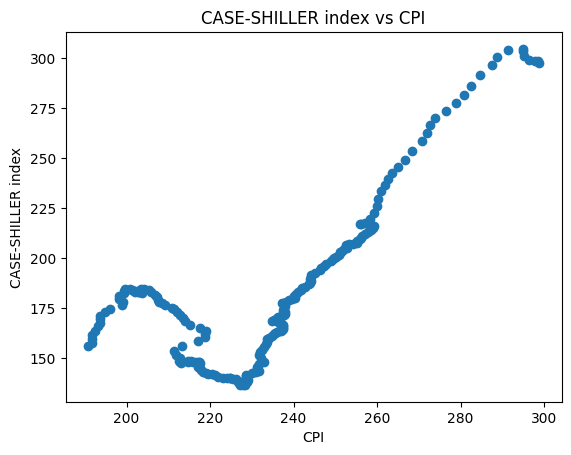

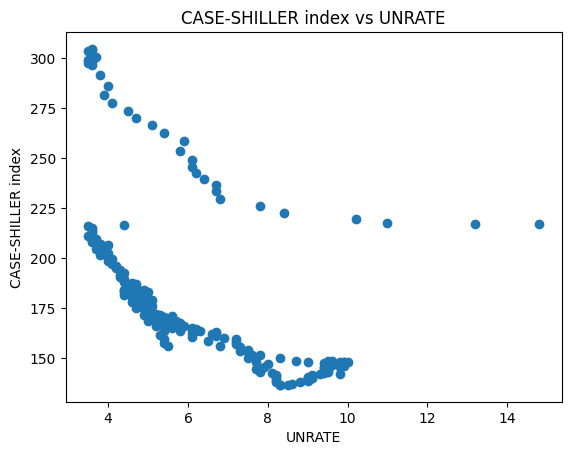

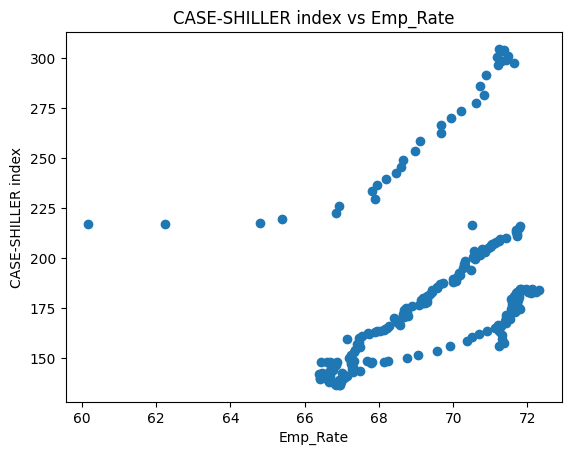

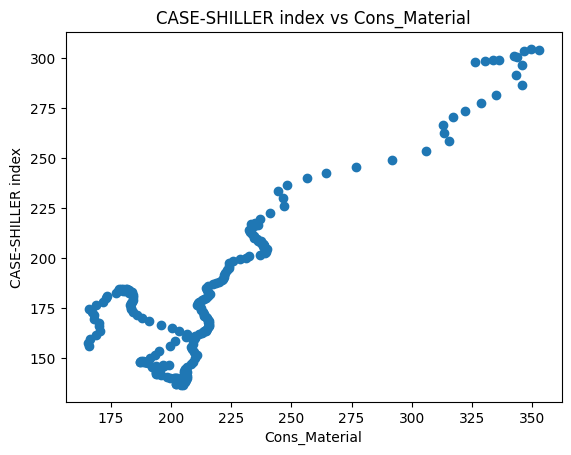

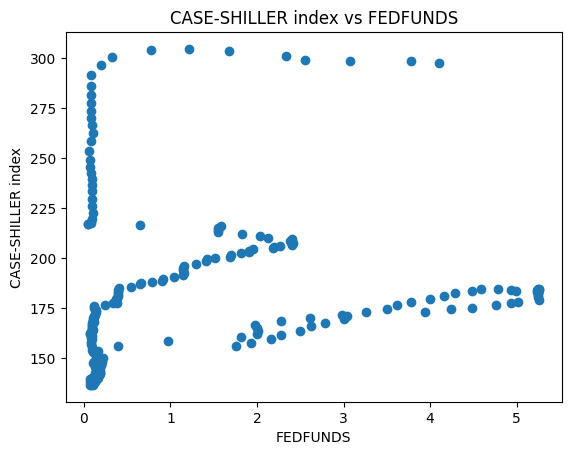

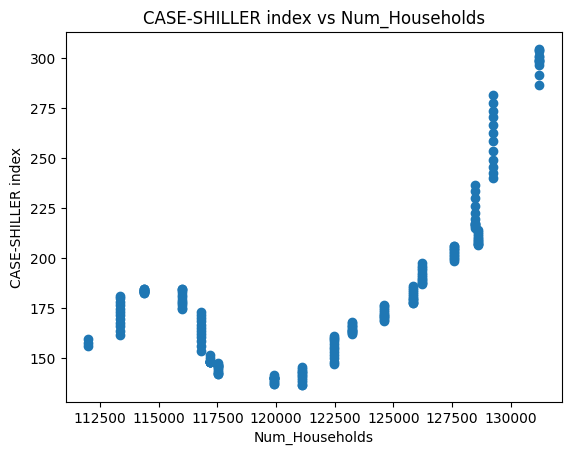

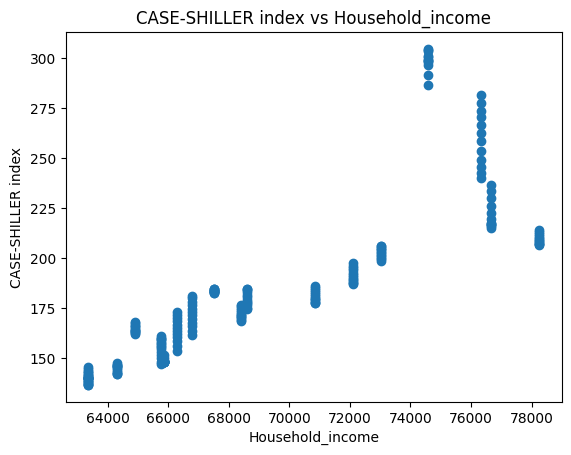

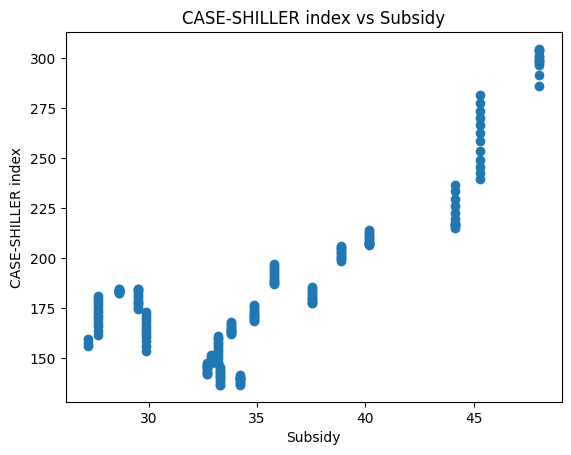

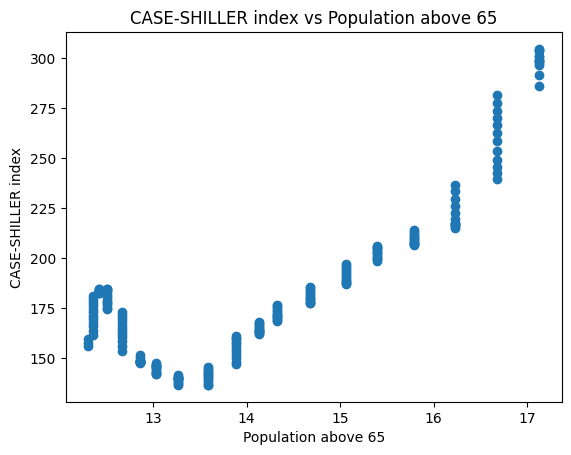

In [24]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

In [25]:
# Calculate correlation coefficients

correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
Houses                 0.015697
FEDFUNDS               0.131832
Emp_Rate               0.408300
working_age_pop        0.508550
UNRATE                 0.542263
Num_Households         0.688002
Unnamed: 0             0.714083
CPI                    0.788463
Subsidy                0.810844
Population above 65    0.815566
Household_income       0.828904
Cons_Material          0.879417
Per_Capita_GDP         0.888338
dtype: float64


In [ ]:
Based on the provided correlation coefficients:
Highest Correlation factor is:
The variable with the highest correlation with the target variable ('CSUSHPISA') 
is 'Per_Capita_GDP' with a correlation coefficient of 0.904325. 
This feature shows a strong positive linear relationship with home prices.

In [ ]:
Other strong correlations are: 
    'Cons_Material' (0.879417),
    'Household_income' (0.828904), 
    'Population above 65' (0.815566),
    'Subsidy'(0.810844),
    'CPI'(0.788463)

In [ ]:
Lower Correlations are: 
    'Houses'(0.015697),
    'FEDFUNDS'(0.131832),
    'Emp_Rate'(0.408300)

In [ ]:
DATA SCIENCE MODELS: 

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel

In [29]:
# DROP columns with low correlation with the target variable 

mult_cols = ["Houses", "FEDFUNDS", "Emp_Rate", "working_age_pop", "UNRATE", "Num_Households", "Unnamed: 0"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [30]:
X

,Per_Capita_GDP,CPI,Cons_Material,Household_income,Subsidy,Population above 65
DATE,,,,,,
2004-01-01,53242.000000,190.800,165.900,65760.0,27.201,12.304719
2004-01-01,53401.000000,191.700,165.500,65760.0,27.201,12.304719
2004-01-01,53560.000000,191.700,166.300,65760.0,27.201,12.304719
2005-01-01,53719.000000,191.600,168.600,66780.0,27.651,12.360163
2005-01-01,53768.666667,192.400,170.400,66780.0,27.651,12.360163
...,...,...,...,...,...,...
2022-01-01,65579.000000,295.209,342.753,74580.0,48.021,17.128121
2022-01-01,65689.000000,296.341,336.464,74580.0,48.021,17.128121
2022-01-01,65799.000000,297.863,333.796,74580.0,48.021,17.128121


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

Model: Linear Regression
Mean Squared Error: 153.47254402663796
R-squared: 0.9282772632121723
Coefficients:
Per_Capita_GDP: 20.106423104276214
CPI: -28.60439396636334
Cons_Material: 38.51440300048458
Household_income: 16.871005712952616
Subsidy: 4.100696748552395
Population above 65: -11.960235606201497
Intercept: 183.4289828571428

Model: ElasticNet
Mean Squared Error: 432.7886105566359
R-squared: 0.7977437345774656
Coefficients:
Per_Capita_GDP: 7.587380748951847
CPI: 1.2386455919467476
Cons_Material: 9.76641820967729
Household_income: 9.529310085636052
Subsidy: 2.9347251616135415
Population above 65: 2.3254433474498026
Intercept: 183.42898285714284

Model: Random Forest
Mean Squared Error: 2.1218022720521743
R-squared: 0.9990084124372904
Feature Importance Analysis:
Per_Capita_GDP: 0.06023852126266074
CPI: 0.3171022942974147
Cons_Material: 0.3218158028043186
Household_income: 0.17006502865826156
Subsidy: 0.06181688789090095
Population above 65: 0.06896146508644344

Model: Gradient Bo

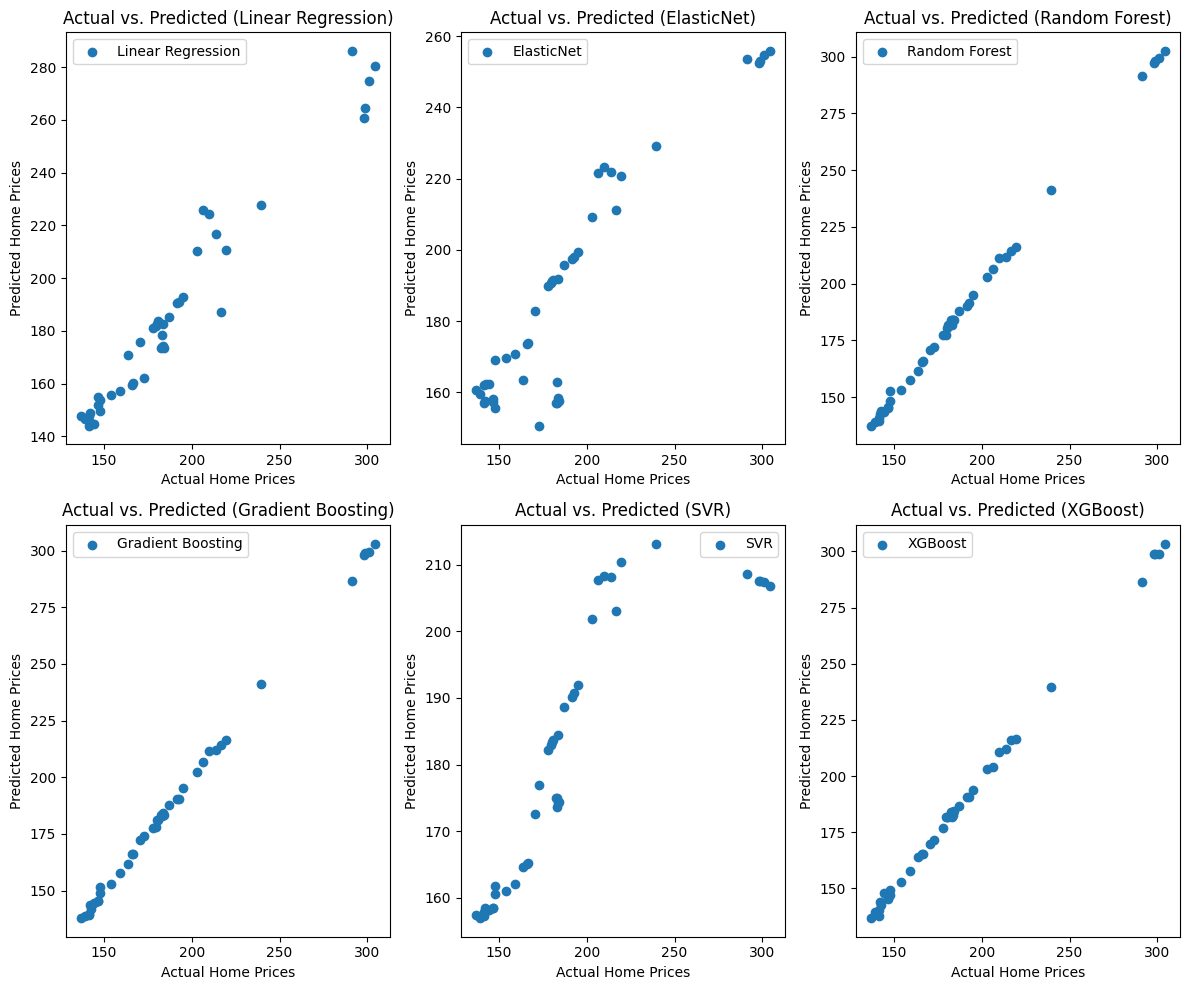


Best Model: RandomForestRegressor with MSE: 2.1218022720521743


In [39]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")
        
        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")


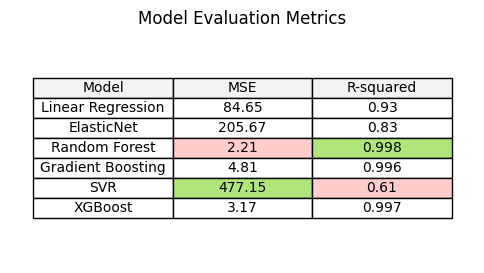

In [40]:
# Assuming you have a DataFrame with model names and their corresponding evaluation metrics
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'MSE': [84.65, 205.67, 2.21, 4.81, 477.15, 3.17],
    'R-squared': [0.93, 0.83, 0.998, 0.996, 0.61, 0.997]
}

df = pd.DataFrame(data)

# Create a table plot using matplotlib
fig, ax = plt.subplots(figsize=(6, 3)) 

# Hide the axes
ax.axis('off')

# Create a table and add data
table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc = 'center', loc='center', colColours=['#f3f3f3']*len(df.columns), colWidths=[0.25]*len(df.columns))

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust the table size if needed

# Highlight specific values (e.g., minimum and maximum MSE)
min_mse_index = np.argmin(df['MSE'])
max_mse_index = np.argmax(df['MSE'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df.columns.get_loc('MSE'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df['R-squared'])
max_r2_index = np.argmax(df['R-squared'])

for i in range(len(df)):
    for j in range(len(df.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

In [ ]:
Decision:

- Random Forest and XGBoost appear to be strong data science models for this project,
as they have low MSE and high R-squared values. 

- Gradient Boosting also performs well but with a slightly higher MSE compared to Random Forest and XGBoost.

- Linear Regression and ElasticNet have higher MSE values, indicating potential limitations in predictive accuracy.

- SVR has a considerably higher MSE and lower R-squared, suggesting lower performance compared to other models.

The best model: Based on the provided metrics, 
    Random Forest appear to be a strong candidate for the best model, with a low MSE and a high R-squared value.

Low MSE: The low MSE indicates that the model's predictions are close to the actual values on average, suggesting good predictive accuracy.
High R-squared: The high R-squared value suggests that a significant portion of the variance in home prices is explained by the model. This indicates strong explanatory power.